# 2. MODELOS GARCH UNIVARIANTES

In [8]:
setwd("C:/Users/oscar/OneDrive/Escritorio/AST")

Muchas veces no nos interesa solamente pronostícar una serie de tiempo en sí, sino su volatilidad también. Un gran ejemplo de ello es el retorno de un activo financiero. Los inversionistas no sólo están interesados en pronosticar el retorno del activo sino tambien su volatilidad que es una medida de riesgo. En este capitulo estudiaremos modelos que nos permiten pronosticar esta volatilidad.

### 2.1 Modelo ARCH(m)

Sea el modelo AR(1):

$$Y_t = c + \phi Y_{t - 1} + u_t$$

donde $u_t$ es el error de pronóstico para $t$ y es ruido blanco; es decir:

$$u_t = Y_t - E_{t - 1}[Y_t]$$

$E_{t - 1}[Y_t] = c + \phi Y_{t - 1}$ es la media condicional de $Y_t$ en base a información hasta $t - 1$ y es el pronóstico que tenemos de la variable.

Habiámos mencionado que si $|\phi| < 1$ el modelo AR(1) es estacionario con media no-condicional $\mu = \frac{c}{1 - \phi}$ y varianza no condicional $\gamma_0 = \frac{\sigma^2}{1 - \phi^2}$. Si bien estos dos términos son constantes para el proceso AR(1), la  media y varianza condicional no lo son (ya lo vimos en el caso de la media condicional). La varianza condicional vendría dada por:

$$Var_{t - 1}(Y_t) = E_{t - 1}[Y_t - c - Y_{t - 1}]^2 = E_{t - 1}(u^2_t)$$

Si asumimos que $u^2_t$ sigue un proceso AR(m):

$$u^2_t = \zeta + \alpha_1 u^2_{t - 1} + \alpha_2 u^2_{t - 2} + \dots + \alpha_m u^2_{t - m} + w_t$$

donde $w_t$ es otro proceso ruido blanco. La varianza condicional de $Y_t$ vendría dada por:

$$Var_{t - 1}(Y_t) = \zeta + \alpha_1 u^2_{t - 1} + \alpha_2 u^2_{t - 2} + \dots + \alpha_m u^2_{t - m}$$

como la varianza condicional no es constante decimos que es heteroscedástica y que sigue un proceso AR(m). En resumen, la varianza condicional sigue un proceso ARCH(m).



Para que el proceso $u^2_t$ sea estacionario, todas las raices del polinomio $1 - \alpha_1 z - \alpha_2 z^2 - \dots - \alpha_m z^m = 0$ deben estar fuera del círculo unitario. Adicionalmente la varianza condicional debe ser positiva por lo que se requiere que $\zeta > 0$ y $\alpha_i \geq 0$ para $i = 1, \dots, m$. Esto último es equivalente a que:

$$\alpha_1 + \alpha_2 + \dots + \alpha_m < 1$$. Con esto, la varianza incondicional de $u_t$ está dada por:

$$\sigma^2 = E(u^2_t) = \frac{\zeta}{1 - \alpha_1 - \alpha_2 - \alpha_m}$$

y la varianza incondicional de $Y_t$ sería:

$$\gamma_0 = \frac{\zeta}{(1 - \phi^2)(1 - \alpha_1 - \alpha_2 -\dots - \alpha_m)}$$.

Engle(1982) propuso la siguiente especificación para el proceso $u_t$:

$$u_t = \nu_t\sqrt{h_t}$$

donde $\nu_t$ es un proceso i.i.d con $E(\nu_t) = 0$ y $E(\nu^2_t) = 1$. Además:

$$h_t = \zeta + \alpha_1 u^2_{t - 1} + \alpha_2 u^2_{t - 2} + \dots + \alpha_m u^2_{t - m}$$

Esta es la manera en que se representa el modelo ARCH(m).

Podemos comparar la diferencia entre un modelo AR(1) y un modelo AR(1) - ARCH(1).

Sea el modelo AR(1):

$$Y_t = 0.85 Y_{t - 1} + u_t$$

Sea el modelo AR(1) - ARCH(1):

$$Y_t = 0.85 Y_{t - 1} + u_t$$

$$u_t = \nu_t \sqrt{h_t}$$

$$h_t = 1.5 + 0.4 u^2_{t - 1}$$

Empezamos con el modelo AR(1):

In [9]:
set.seed(12345)
u_1 <- rnorm(500)
y_1 <- rep(0, 500)
y_1[1] <- 1
for (i in 2:500) {
    y_1[i] <- 0.85 * y_1[i - 1] + u_1[i] 
}

Ahora el modelo AR(1)-ARCH(1):

In [10]:
u_2 <- rep(0, 500)
u_2[i] <- rnorm(1)
v <- rnorm(500)
h <- rep(0, 500)
y_2 <- rep(0, 500)
y_2[1] <- 1
for (i in 2:500) {
    h[i] <- 1.5 + 0.4 * u_2[i - 1]^2
    u_2[i] <- v[i] * sqrt(h[i])
    y_2[i] <- 0.85 * y_2[i - 1] + u_2[i]
}

Comparamos ambos procesos:

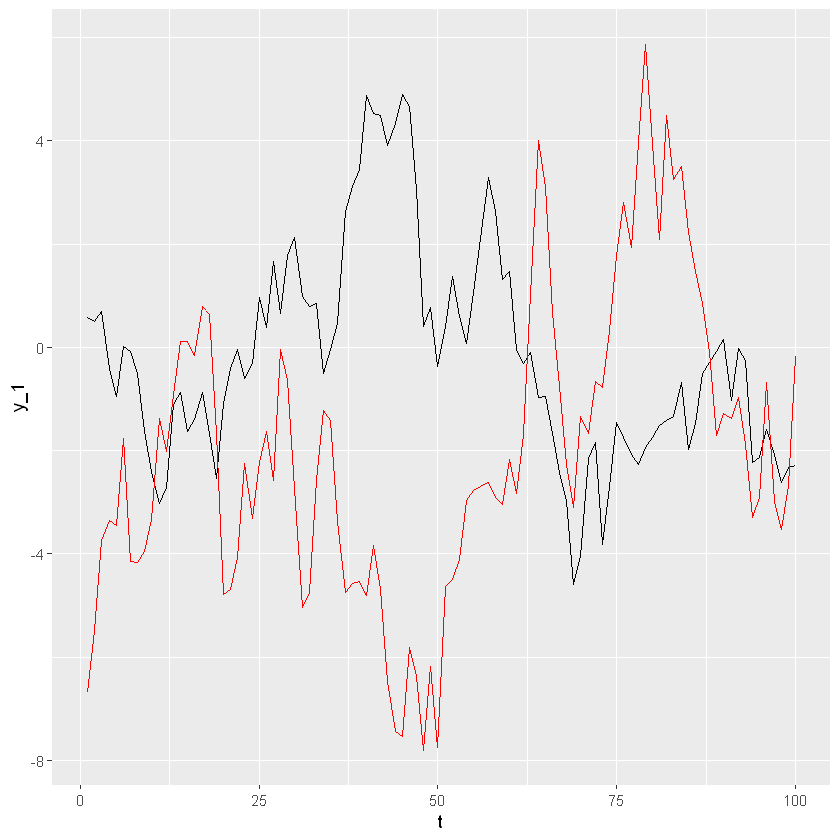

In [11]:
datos_sim <- data.frame(t = 1:100, y_1 = y_1[401:500], y_2 = y_2[401:500])
library(ggplot2)
g <- ggplot(data = datos_sim, aes(x = t))
g + geom_line(aes(y = y_1)) + geom_line(aes(y = y_2), color = "red")

Hay diferencia entre ambos procesos, siendo el proceso AR(1) - ARCH(1) el más volátil.

### 2.2 Modelo GARCH(r, m)

Supongamos que $Y_t$ tiene un proceso ARCH($\infty$), entonces:

$$h_t = \zeta + \sum^\infty_{j = 1}\pi_j L^j u^2_t$$

Sabemos por el estudio de los modelos MA($\infty$) que el polinomio $\pi(L) = \sum^\infty_{j = 1}\pi_j L^j$ puede ser escrito por el cociente de dos polinomios de orden finito, entonces:

$$\pi(L) = \frac{\alpha(L)}{\delta(L)} = \frac{\alpha_1 L + \alpha_2 L^2 + \dots + \alpha_m L^m}{1 - \delta_1 L - \delta_2 L^2 - \dots - \delta_r L^r}$$ 

Así tendríamos que:

$$h_t = \kappa + \delta_1 h_{t - 1} + \delta_2 h_{t - 2} + \dots + \delta_r h_{t - r} + \alpha_1 u^2_{t - 1} + \alpha_2 u^2_{t - 2} + \dots + \alpha_m u^2_{t - m}$$

donde $\kappa = \zeta(1 - \delta_1 - \delta_2 - \dots - \delta_r)$. Si la varianza condicional de $Y_t$ sigue este proceso se dice que sigue el proceso GARCH(r, m).

Uno estaría tentado a ver la analogía directa del proceso GARCH(r, m) con un ARMA(r, m) pero no es tanto así porque $u^2_t$ no es un proceso ruido blanco. Para ver la representación ARMA hay que añadir $u^2_t$ a ambos lados de la ecuación y reescribirla:

$$h_t + u^2_t = \kappa - \delta_1(u^2_{t - 1} - h_{t - 1}) - \delta_2(u^2_{t - 2} - h_{t - 2}) - \dots - \delta_r(u^2_{t - r} - h_{t - r} + (\alpha_1 + \delta_1) u^2_{t - 1} + (\alpha_2 + \delta_2) u^2_{t - 2} + \dots + (\alpha_p + \delta_p) u^2_{t - p} + u^2_t$$

donde $p = \max(m, r)$. Los valores entre paréntesis son ruido blanco ya que es la diferencia entre la varianza condicional observada y su pronóstico. Por lo tanto:

$$u^2_t = \kappa + (\alpha_1 + \delta_1) u^2_{t - 1} + (\alpha_2 + \delta_2)u^2_{t - 2} + \dots + (\alpha_p + \delta_p) u^2_{t - p} + w_t - \delta_1 w_{t - 1} - \delta_2 w_{t - 2} - \dots - \delta_r w_{t - r}$$ 

Entonces hemos reescrito el proceso GARCH(r.m) como un proceso ARMA(p, r). La varianza condicional será positiva siempre y cuando $\kappa > 0$ y $\alpha_i \geq 0$ y $\delta_i \geq 0$ para $i = 1, \dots, p$. Observando el proceso ARMA(p, r), la estacionariedad está garantizada si las raíces del polinomio carcaterístico:

$$ 1 - (\alpha_1 + \delta_1)z - (\alpha_2 + \delta_2)z^2 - \dots - (\alpha_p + \delta_p)z^p = 0 $$

están fuera del círculo unitario. Con la no-negatividad de los coeficientes, la condición de estacionariedad se resume a:

$$(\alpha_1 + \delta_1) + (\alpha_2 + \delta_2) + \dots + (\alpha_p + \delta_p) < 1$$

Dado que el proceso GARCH(r, m) puede ser representado por un proceso ARMA(p, r) podemos utilizar la ACF para identificar el orden r y la PACF para identificar el orden m si $m \geq r$.


Adicionalmente podemos utilizar el siguiente procedimiento para identificar el orden m:

1. Estimar el model ARMA más idóneo para $Y_t$ y obtener los residuos $\hat{u}_t$.
2. Efectuar la regresión:
$$\hat{u}^2_t = \alpha_0 + \alpha_1 \hat{u}^2_{t - 1} + \alpha_2 \hat{u}^2_{t - 2} + \dots + \alpha_m \hat{u}^2_{t - m} + v_t$$
3. Calcular el estadístico $TR^2$ que sigue una distribución $\chi^2$ con $m$ grados de libertad. La hipótesis nula es que no hay componente $m$ en el modelo GARCH.

Podemos ilustrar esto con un modelo AR(1) - GARCH(1, 1):

$$Y_t = 0.75 Y_{t - 1} + u_t$$
$$u_t = \nu_t \sqrt{h_t} $$
$$h_t = 1.3 + 0.3 h_{t - 1} + 0.4 u^2_{t - 1}$$


In [12]:
set.seed(12345)
u <- rep(0, 500)
u[1] <- rnorm(1)
v <- rnorm(500)
h <- rep(0, 500)
h[1] <- 1
y <- rep(0, 500)
y[1] <- 1
for (i in 2:500) {
    h[i] <- 1.3 + 0.3 * h[i - 1] + 0.4 * u[i - 1]^2
    u[i] <- v[i] * sqrt(h[i])
    y[i] <- 0.75 * y[i - 1] + u[i]
}

Analizamos si $\hat{u}^2_t$ siguen un modelo GARCH(1, 1):

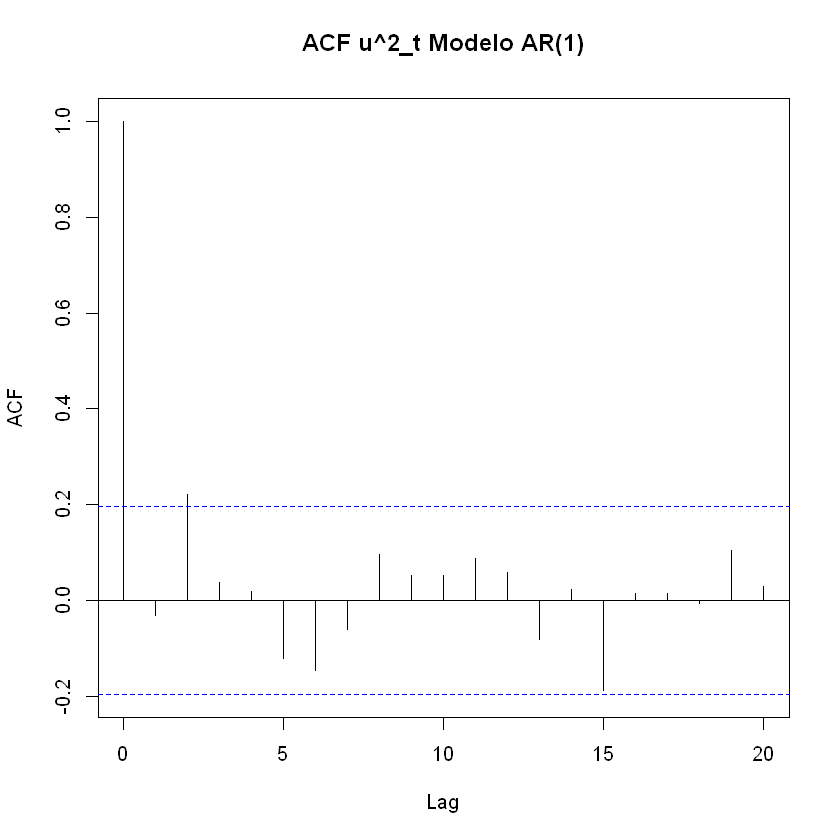

In [13]:
ar1_mod <- arima(y[401:500], order = c(1, 0, 0), method = "CSS", include.mean = FALSE)
acf(ar1_mod$residuals^2, lag.max = 20, main = "ACF u^2_t Modelo AR(1)")

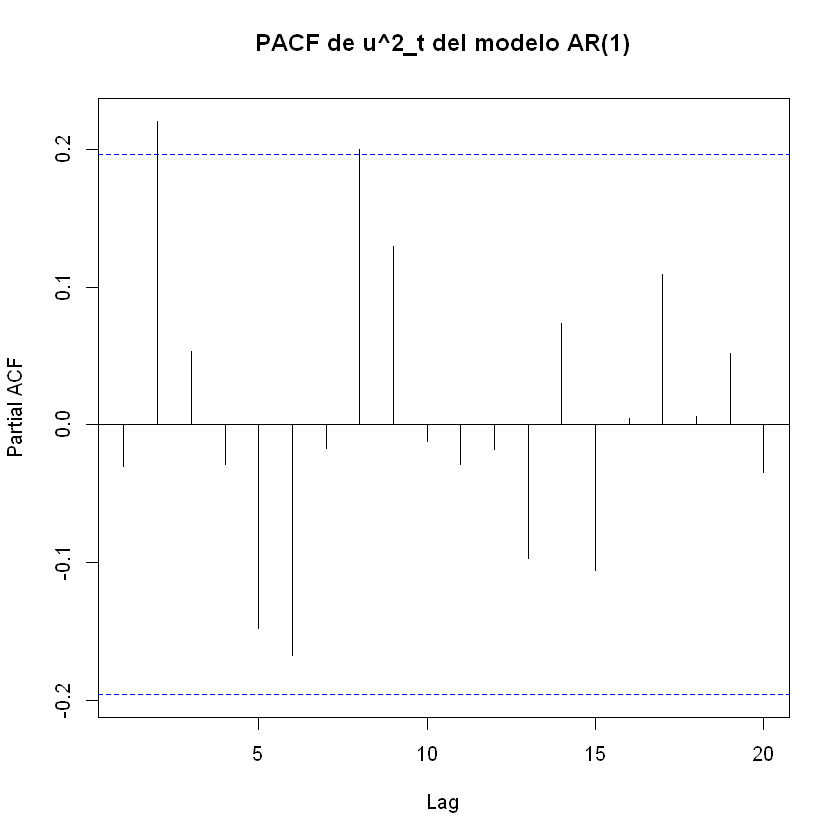

In [14]:
pacf(ar1_mod$residuals^2, lag.max = 20, main = "PACF de u^2_t del modelo AR(1)")

La ACF y PACF apuntan a un modelo GARCH(2, 2) lo cual muestra que los métodos ACF y PACF no son perfectos en la detección del verdadero orden de un modelo GARCH y también ARMA; sin embargo, el resultado tampoco está muy alejado del deseado GARCH(1, 1).

### 3.3 Estimación

La estimación de los modelos ARMA(p, q) - GARCH(r, m) es en forma conjunta. No se estima primero el componente ARMA y luego el GARCH. La estimación es a través de maxima verosimilitud. Consideramos el ejemplo de un modelo AR(1) - GARCH(1, 1):

$$Y_t = c + \phi Y_{t - 1} + u_t$$
$$u_t = \nu_t \sqrt{h_t}$$
$$h_t = \kappa + \delta_1 h_{t - 1} + \alpha_1 u^2_{t - 1}$$

Se considera que $\nu_t \sim N(0, 1)$ entonces $u_t$ tambien sigue una distribución normal y tambien $Y_t$. Tomemos el caso de la observación $y_2$:

$$f_{Y_2 | Y_1}(y_2 | y_1; \Theta) = \frac{1}{\sqrt{2 \pi h_2}} \exp\left(-\frac{(y_2 - c - \phi y_1)^2}{2 h_2} \right)$$

Si consideramos la observarción $y_3$; entonces la función de densidad conjunta viene dada:

$$f_{Y_3, Y_2 | Y_1}(y_3, y_2 | y_1; \Theta) = f_{Y_3 | Y_2}(y_3 | y_2; \Theta) \times f_{Y_2 | Y_1}(y_2 | y_1; \Theta)$$

Para el caso más general:

$$f_{Y_t | Y_{t - 1}}(y_t | y_{t - 1}; \Theta) = \frac{1}{\sqrt{2 \pi h_t}}\exp\left(-\frac{y_t - c - \phi y_{t - 1}}{2 h_t}\right)$$

La función de verosimilitud sería:
$$f_{Y_T, Y_{T - 1}, \dots, Y_2 | Y_1}(y_T, y_{T - 1}, \dots, y_2 | y_1; \Theta) = \prod^T_{t = 2} f_{Y_t | Y_{t - 1}}(y_t | y_{t - 1}; \Theta)$$

Finalmente la función de verosimilitud en logaritmos sería:

$$\log f_{Y_T, Y_{T - 1}, \dots, Y_2 | Y_1}(y_T, y_{T - 1}, \dots, y_2 | y_1; \Theta) = -\frac{T - 1}{2}\log(2 \pi) - \frac{1}{2}\sum^T_{t = 2}\log(h_t) - \frac{1}{2}\sum^T_{t = 2}\left(\frac{(y_t - c - \phi y_{t - 1})}{h_t}\right)$$

Esta es la función que se busca maximizar. Es necesario incluir la restricción que $\kappa > 0$ y $0 \leq \alpha_1 + \delta_1 < 1$. 

Tambien pude darse el caso que no se desee utilizar la distribución normal sino una donde los eventos extremos sean más probables. Es posible por ejemplo asumir que $\nu_t$ sigue una distribución $t$ con $\nu$ grados de libertad. Esto ya lo veremos en seguida en el ejemplo.

Consideremos para el ejemplo un modelo AR(1) - GARCH(1, 1):

$$Y_t = 0.55 Y_{t - 1} + u_t$$
$$u_t = \nu_t\sqrt{h_t}$$
$$h_t = 1.1 + 0.2 h_{t - 1} + 0.7 u^2_{t - 1}$$

In [15]:
set.seed(12345)
u <- rep(0, 500)
u[1] <- rnorm(1); v <- rnorm(500); h <- rep(0, 500)
h[1] <- 1; y <- rep(0, 500); y[1] <- 1
for (i in 2:500) {
    h[i] <- 1.1 + 0.2 * h[i - 1] + 0.7 * u[i - 1]^2
    u[i] <- v[i] * sqrt(h[i])
    y[i] <- 0.55 * y[i - 1] + u[i]
}

In [16]:
# install.packages("rugarch")

In [17]:
library(rugarch)

Loading required package: parallel


Attaching package: 'rugarch'


The following object is masked from 'package:stats':

    sigma




In [18]:
mod_spec <- ugarchspec(variance.model = list(model = "sGARCH", garchOrder = c(1, 1)), 
                       mean.model = list(armaOrder = c(1, 0), include.mean = FALSE), distribution.model = "norm")

In [19]:
argarch_mod <- ugarchfit(spec = mod_spec, data = y[401:500], fit.control = list(stationarity = 1))

In [20]:
show(argarch_mod)


*---------------------------------*
*          GARCH Model Fit        *
*---------------------------------*

Conditional Variance Dynamics 	
-----------------------------------
GARCH Model	: sGARCH(1,1)
Mean Model	: ARFIMA(1,0,0)
Distribution	: norm 

Optimal Parameters
------------------------------------
        Estimate  Std. Error  t value Pr(>|t|)
ar1      0.69810    0.089396   7.8091 0.000000
omega    0.70439    0.380741   1.8501 0.064305
alpha1   0.31163    0.210443   1.4808 0.138650
beta1    0.42014    0.194268   2.1627 0.030566

Robust Standard Errors:
        Estimate  Std. Error  t value Pr(>|t|)
ar1      0.69810     0.11224   6.2200 0.000000
omega    0.70439     0.24303   2.8983 0.003751
alpha1   0.31163     0.18105   1.7213 0.085205
beta1    0.42014     0.11970   3.5100 0.000448

LogLikelihood : -181.6978 

Information Criteria
------------------------------------
                   
Akaike       3.7140
Bayes        3.8182
Shibata      3.7109
Hannan-Quinn 3.7561

Weighted

Los coeficientes estimados están cerca de los valores asumidos. Podemos efectuar el mismo análisis pero considerando una distribución $t$ para las innovaciones $\nu_t$.

In [21]:
mod_spec <- ugarchspec(variance.model = list(model = "sGARCH", garchOrder = c(1, 1)), 
                       mean.model = list(armaOrder = c(1, 0), include.mean = FALSE), distribution.model = "std")

In [22]:
argarch_mod <- ugarchfit(spec = mod_spec, data = y[401:500], fit.control = list(stationarity = 1))

In [23]:
show(argarch_mod)


*---------------------------------*
*          GARCH Model Fit        *
*---------------------------------*

Conditional Variance Dynamics 	
-----------------------------------
GARCH Model	: sGARCH(1,1)
Mean Model	: ARFIMA(1,0,0)
Distribution	: std 

Optimal Parameters
------------------------------------
        Estimate  Std. Error  t value Pr(>|t|)
ar1      0.69682    0.089567   7.7799 0.000000
omega    0.70596    0.386086   1.8285 0.067475
alpha1   0.31015    0.211510   1.4664 0.142547
beta1    0.42211    0.197308   2.1393 0.032409
shape   99.99160  283.582154   0.3526 0.724387

Robust Standard Errors:
        Estimate  Std. Error  t value Pr(>|t|)
ar1      0.69682     0.11333   6.1487 0.000000
omega    0.70596     0.24339   2.9005 0.003726
alpha1   0.31015     0.17964   1.7265 0.084264
beta1    0.42211     0.12026   3.5099 0.000448
shape   99.99160    44.72871   2.2355 0.025384

LogLikelihood : -181.7524 

Information Criteria
------------------------------------
                

Estima 99 grados de libertad lo cual es mayor que los 30 que generalmente se considera para que la distribución $t$ sea una buena aproximación de la normal. En otras palabras, el supuesto de normalidad de las innovaciones está justificado.

Una etapa importante después de la estimación del modelo es el diagnóstico de los residuos. Comenzamos verificando si el modelo AR(1) es el adecuado. Lo verificamos con al ACF de los residuos.

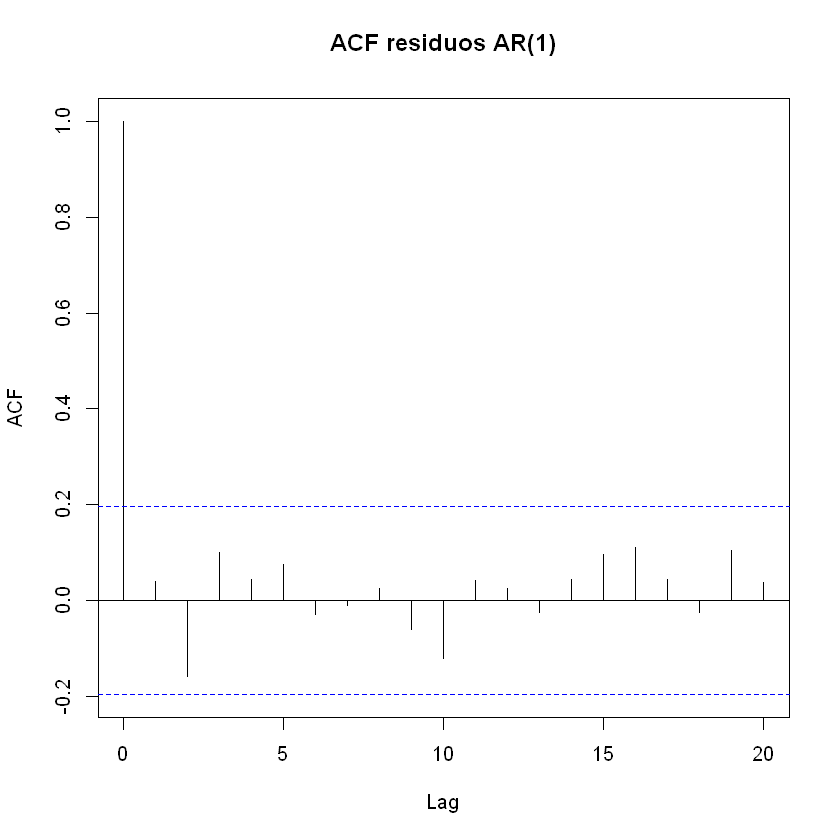

In [24]:
acf(argarch_mod@fit$residuals, lag.max = 20, main = "ACF residuos AR(1)")

Para evaluar el componente GARCH(1, 1) se obtiene la ACF y PACF de los residuos estandarizados $\frac{u_t}{\sqrt{h_t}}$. 

In [25]:
stand_res <- argarch_mod@fit$residuals / argarch_mod@fit$sigma

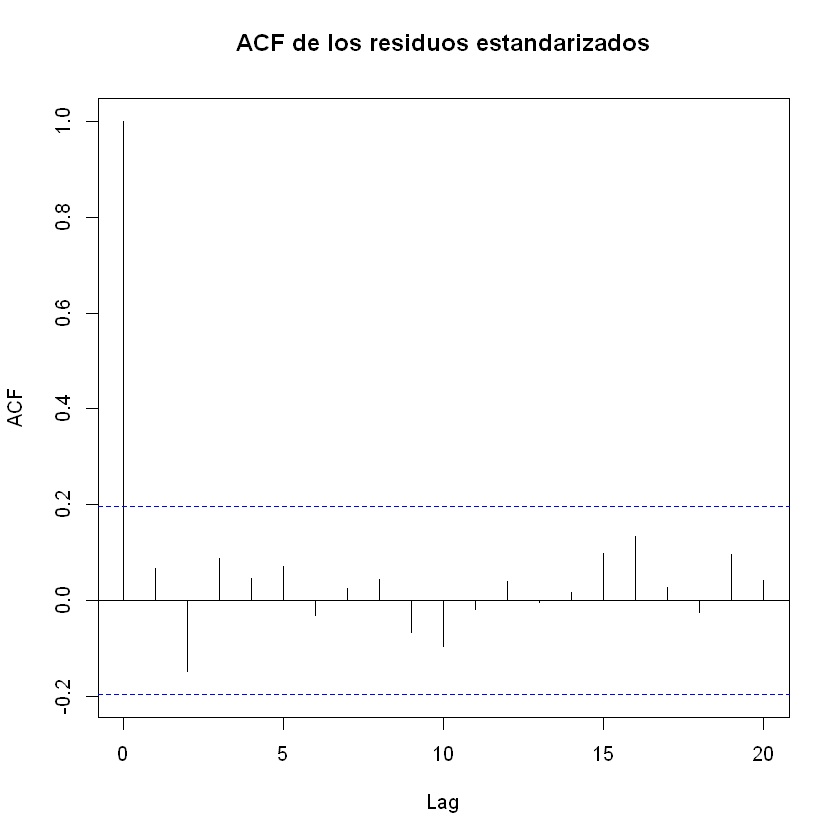

In [26]:
acf(stand_res, lag.max = 20, main = "ACF de los residuos estandarizados")

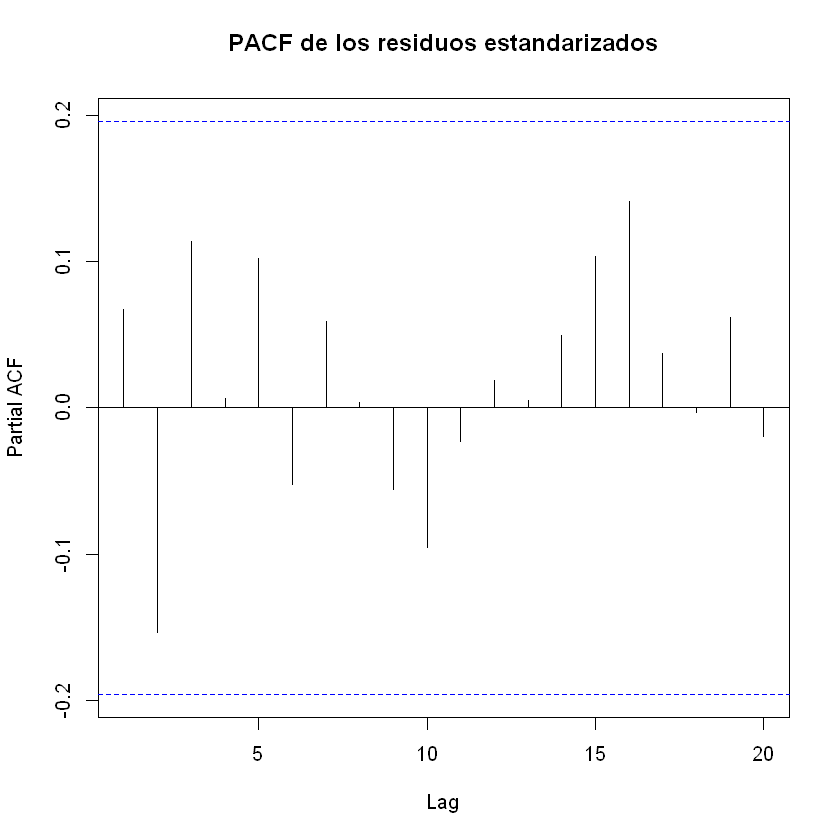

In [27]:
pacf(stand_res, lag.max = 20, main = "PACF de los residuos estandarizados")

Estas pruebas pueden complementarse con los Test de Portmanteau.

### 3.4 Pronóstico con modelos GARCH

Tanto los modelos GARCH(r, m) como los modelos ARCH(m) estacionarios, sus pronósticos convergen a la media del proceso. Tomemos como ejemplo el caso de un modelo AR(1) - GARCH(1, 1):

$$Y_t = c + \phi Y_{t - 1} + u_t$$
$$u_t = \nu_t \sqrt{h_t}$$
$$h_t = \kappa + \delta_1 h_{t - 1} + \alpha_1 u^2_{t - 1}$$

Entonces el pronóstico $Var_{t + j - 1}(Y_{t + j}) = \frac{\kappa}{(1 - \phi^2)(1 - (\alpha_1 + \delta_1))}$ a medida que $j \to \infty$. Ilutremos esto con un ejemplo. Sea el modelo AR(1) - GARCH(1, 1):

$$Y_t = 1.2 + 0.4 Y_{t - 1} + u_t$$
$$u_t = \nu_t \sqrt{h_t}$$
$$h_t = 0.6 + 0.3 h_{t - 1} + 0.6 u^2_{t - 1}$$

In [28]:
set.seed(12345)
u <- rep(0, 500)
u[1] <- rnorm(1); h <- rep(0, 500); h[1] <- 1
v <- rnorm(500); y <- rep(0, 500); y[1] <- 1
for (i in 2:500) {
    h[i] <- 0.6 + 0.3 * h[i - 1] + 0.6 * u[i - 1]^2
    u[i] <- v[i] * sqrt(h[i])
    y[i] <- 1.2 + 0.4 * y[i - 1] + u[i]
}

In [29]:
mod_spec <- ugarchspec(variance.model = list(model = "sGARCH", garchOrder = c(1, 1)), 
                       mean.model = list(armaOrder = c(1, 0), include.mean = TRUE), distribution.model = "norm")
argarch_mod <- ugarchfit(spec = mod_spec, data = y[401:500], fit.control = list(stationarity = 1))

In [30]:
argarch_for <- ugarchforecast(argarch_mod, n.ahead = 50)
argarch_for


*------------------------------------*
*       GARCH Model Forecast         *
*------------------------------------*
Model: sGARCH
Horizon: 50
Roll Steps: 0
Out of Sample: 0

0-roll forecast [T0=1970-04-10 20:00:00]:
     Series Sigma
T+1   1.024 1.111
T+2   1.383 1.159
T+3   1.574 1.195
T+4   1.675 1.223
T+5   1.728 1.244
T+6   1.757 1.260
T+7   1.772 1.272
T+8   1.780 1.282
T+9   1.784 1.289
T+10  1.786 1.295
T+11  1.787 1.299
T+12  1.788 1.303
T+13  1.788 1.305
T+14  1.789 1.307
T+15  1.789 1.309
T+16  1.789 1.310
T+17  1.789 1.311
T+18  1.789 1.312
T+19  1.789 1.313
T+20  1.789 1.313
T+21  1.789 1.313
T+22  1.789 1.314
T+23  1.789 1.314
T+24  1.789 1.314
T+25  1.789 1.314
T+26  1.789 1.314
T+27  1.789 1.314
T+28  1.789 1.314
T+29  1.789 1.315
T+30  1.789 1.315
T+31  1.789 1.315
T+32  1.789 1.315
T+33  1.789 1.315
T+34  1.789 1.315
T+35  1.789 1.315
T+36  1.789 1.315
T+37  1.789 1.315
T+38  1.789 1.315
T+39  1.789 1.315
T+40  1.789 1.315
T+41  1.789 1.315
T+42  1.789 1.315
T+43  1.

### 3.5 Modelo GARCH Integrado

Mencionamos que el requisito para que el modelo GARCH(r, m) sea estacionario es que:

$$\sum^r_{j = 1} \delta_j + \sum^m_{j = 1} \alpha_m < 1$$

Sin embargo, al estimar modelos GARCH es series de tiempo financieras muchas veces esta suma es cercana a 1. Engle y Bollerslev (1986) consideraron un modelo donde se imponga la restricción que:

$$\sum^r_{j = 1} \delta_j + \sum^m_{j = 1} \alpha_m = 1$$

LLamando a estos modelos GARCH integrados. Una de las propiedades más importantes de los modelos GARCH integrados es que la varianza no condicional de $u_t$ es infinita, así que ni $u_t$ ni $u^2_t$ satisfacen la definición de procesos estacionarios. Sin embargo, Nelson (1990) mostró que es posible que $u_t$ provenga de un proceso estrictamente estacionario en el sentido que la función de densidad no condicional de $u_t$ es la misma para todo $t$.

### 3.6 El modelo GARCH exponencial

Nelson (1991) propuso el siguiente modelo GARCH exponencial:

$$\log(h_t) = \zeta + \sum^\infty_{j = 1}\pi_j[|\nu_{t - j}| - E|\nu_{t - j}| + \aleph \nu_{t - j}]$$

Si $\pi_j < 0$, el modelo de Nelson implica que una desviación de $|\nu_{t - j}|$ de su valor esperado ocasiona que la varianza de $u_t$ sea mayor (efecto tamaño). El parámetro $\aleph$ ocasiona que este efecto sea asimétrico. Si $\aleph = 0$, entonces una sorpresa positiva ($\nu_{t - j} > 0$) tiene el mismo efecto que una sorpresa negativa de la misma magnitud. Si $-1 < \aleph < 0$, una sorpresa positiva incrementa la volatilidad menos que una sorpresa negativa. Si $\aleph < -1$, una sorpresa positiva reduce la volatilidad mientras que una sorpresa negativa incrementa la volatilidad.

Mucha investigación en los retornos de acciones a mostrado que sorpresas negativas tienden a incrementar la volatilidad más que las sorpresas positivas. Ya que una cáida en el valor de las acciones incrementa el valor del ratio de apalancamiento, a este efecto de $\aleph < 0$ se lo conoce como el efecto apalancamiento.

Una de las grandes ventajas de este modelo GARCH exponencial o EGARCH como se lo conoce es que no hay que imponer restricciones en los coeficientes estimados para que la varianza condicional sea positiva. El modelo es estacionario siempre y cuando $\sum^\infty_{j = 1}\pi^2_j < \infty$. 

Podemos expresar el polinomio $\sum^\infty_{j = 1} \pi_j L^j$ como un ratio de dos polinomios finitos $\alpha(L)$ y $\delta(L)$ con lo que el modelo EGARCH quedaría representado por:

$$log(h_t) = \kappa + \delta_1 \log(h_{t - 1}) + \delta_2 \log(h_{t - 2}) + \dots + \delta_r \log(h_{t - r}) + \alpha_1[|\nu_{t - 1}| - E|\nu_{t - 1}| + \aleph \nu_{t - 1}] + \alpha_2[|\nu_{t - 2}| - E|\nu_{t - 2}| + \aleph \nu_{t - 2}] + \dots + \alpha_m[|\nu_{t - m}| - E|\nu_{t - m}| + \aleph \nu_{t - m}]$$

### 3.7 El modelo GJR-GARCH

El modelo GJR-GARCH fue propuesto pro Glosten, Jagannathan y Runkle (1993). Estipula el siguiente modelo:

$$h_t = \kappa + \delta_1 h_{t - 1} + \alpha_1 u^2_{t - 1} + \aleph u^2_{t - 1}I_{t - 1}$$

Aqui $I_{t - 1} = 1$ si $u_{t - 1} \geq 0$ y $I_{t - 1} = 0$ si $u_{t - 1} < 0$. El efecto apalancamiento se manifiesta si $\aleph < 0$. La condición de varianza condicional positiva se cumple si $\delta_1 \geq 0$ y si $\alpha_1 + \aleph \geq 0$.

### 3.8 Caso de Estudio: Pronóstico para 5 días del retorno del S&P500

In [31]:
sp_datos <- read.csv("./Datos/SP.csv")
head(sp_datos)

,X,symbol,date,open,high,low,close,volume,adjusted
,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,^GSPC,2011-01-03,1257.62,1276.17,1257.62,1271.87,4286670000,1271.87
2,2,^GSPC,2011-01-04,1272.95,1274.12,1262.66,1270.20,4796420000,1270.20
3,3,^GSPC,2011-01-05,1268.78,1277.63,1265.36,1276.56,4764920000,1276.56
4,4,^GSPC,2011-01-06,1276.29,1278.17,1270.43,1273.85,4844100000,1273.85
5,5,^GSPC,2011-01-07,1274.41,1276.83,1261.70,1271.50,4963110000,1271.50
6,6,^GSPC,2011-01-10,1270.84,1271.52,1262.18,1269.75,4036450000,1269.75


In [32]:
n <- nrow(sp_datos)
ret_sp <- sp_datos$close[2:n] / sp_datos$close[1:(n - 1)] - 1
sp_datos$ret <- c(NA, ret_sp)

In [33]:
sp_datos$date <- as.Date(as.character(sp_datos$date), "%Y-%m-%d")
class(sp_datos$date)

[1] "Date"

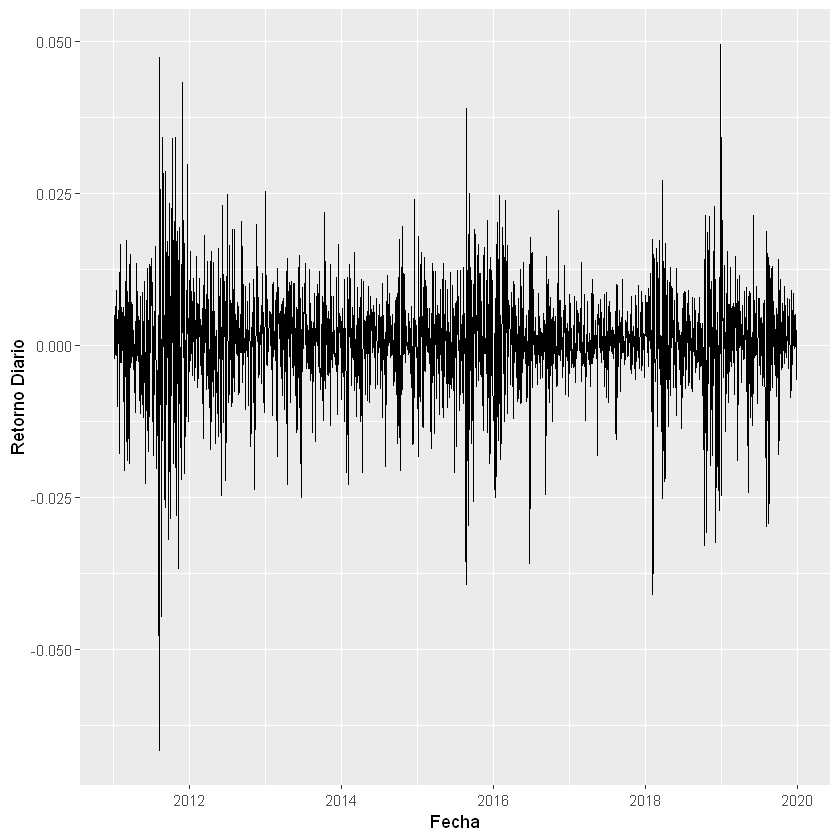

In [35]:
# library(ggplot2)
g <- ggplot(data = sp_datos[2:n,], aes(x = date, y = ret))
g + geom_line() + labs(x = "Fecha", y = "Retorno Diario")

Como mencionamos anteriormente, en el mercado de acciones se observan periodos de moderada y de alta volatilidad. No observamos ninguna tendencia ni estacionalidad por lo que podemos proceder a modelar la media del proceso.

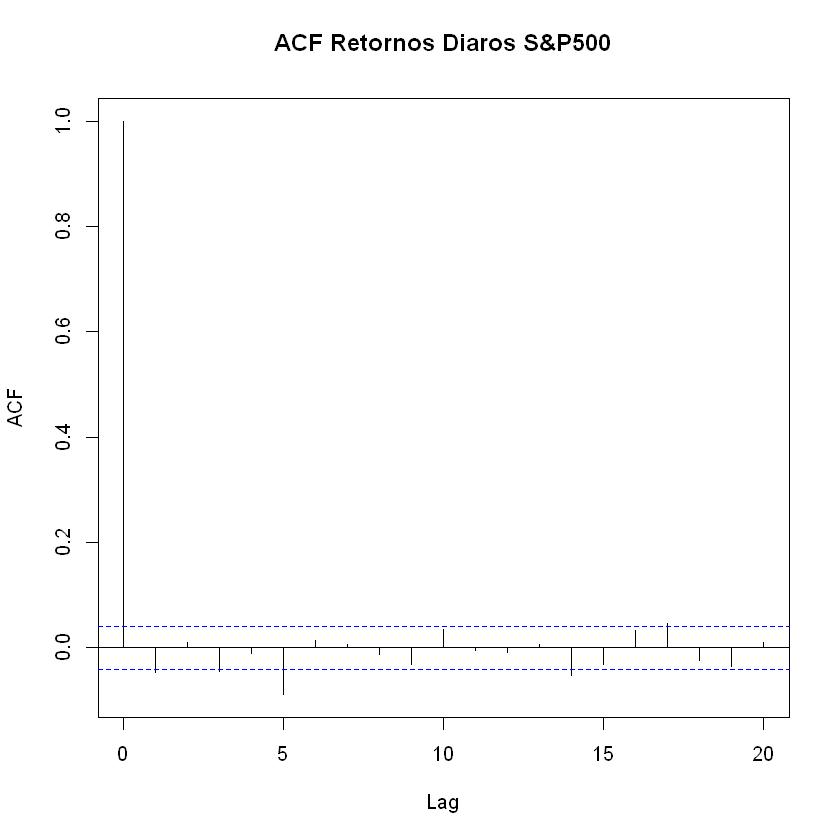

In [47]:
acf(sp_datos$ret[2:(n - 4)], lag.max = 20, main = "ACF Retornos Diaros S&P500")

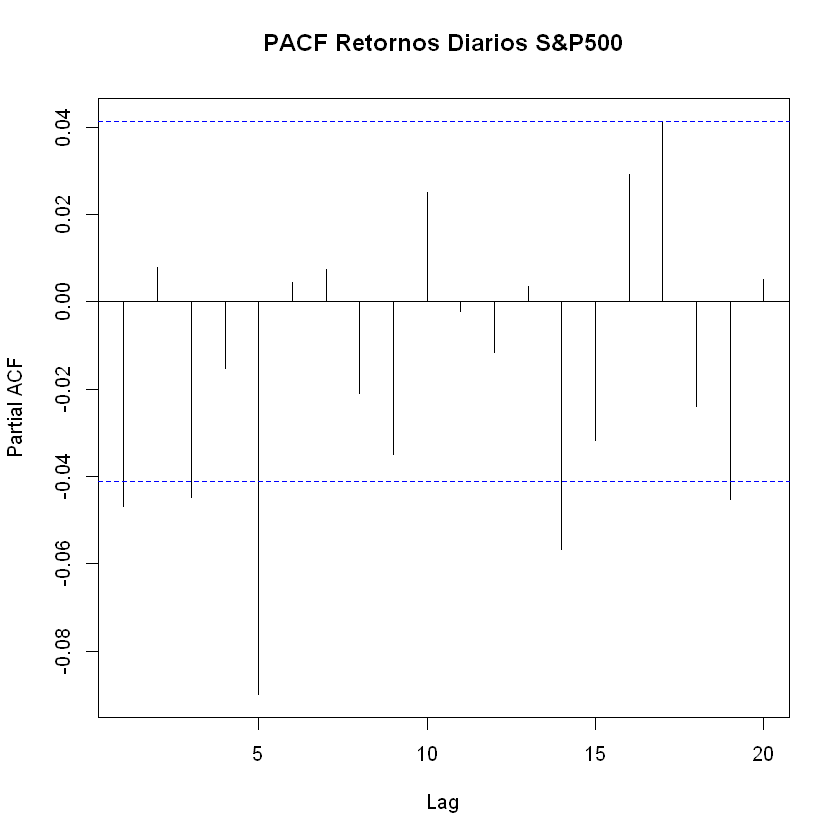

In [48]:
pacf(sp_datos$ret[2:(n - 4)], lag.max = 20, main = "PACF Retornos Diarios S&P500")

Las opciones de modelado son: AR(1), AR(3), AR(5), MA(5), ARMA(1, 5), ARMA(3, 5) y ARMA(5, 5). Seleccionaremos el modelo más idóneo revisando los criterios de AKaike y Schwartz.

In [49]:
for (i in c(0, 1, 3, 5)) {
    for (j in c(0, 5)) {
        arma_mod <- arima(sp_datos$ret[2:(n - 4)], order = c(i, 0, j), method = "ML", include.mean = TRUE)
        AIC_val <- AIC(arma_mod)
        BIC_val <- BIC(arma_mod)
        res <- paste("Para el modelo ARMA(", i, ",", j, ") tenemos un AIC de ", AIC_val, 
                     " y un BIC de", BIC_val, sep = "")
        print(res)
    }
}

[1] "Para el modelo ARMA(0,0) tenemos un AIC de -14833.8400116759 y un BIC de-14822.3955421865"
[1] "Para el modelo ARMA(0,5) tenemos un AIC de -14852.32633434 y un BIC de-14812.270691127"
[1] "Para el modelo ARMA(1,0) tenemos un AIC de -14836.7969203022 y un BIC de-14819.6302160681"
[1] "Para el modelo ARMA(1,5) tenemos un AIC de -14850.6069179777 y un BIC de-14804.82904002"
[1] "Para el modelo ARMA(3,0) tenemos un AIC de -14837.4896894321 y un BIC de-14808.8785157086"
[1] "Para el modelo ARMA(3,5) tenemos un AIC de -14863.3187064138 y un BIC de-14806.0963589667"
[1] "Para el modelo ARMA(5,0) tenemos un AIC de -14852.3233314475 y un BIC de-14812.2676882345"
[1] "Para el modelo ARMA(5,5) tenemos un AIC de -14864.0438596798 y un BIC de-14795.3770427433"


De acuerdo al criterio de Schwartz escogemos para la media un modelo AR(1). Ahora evaluamos el cuadrado de los residuos para determinar el orden GARCH(r, m).

In [65]:
ar1_mod <- arima(sp_datos$ret[2:(n - 4)], order = c(5, 0, 0), method = "ML", include.mean = TRUE)

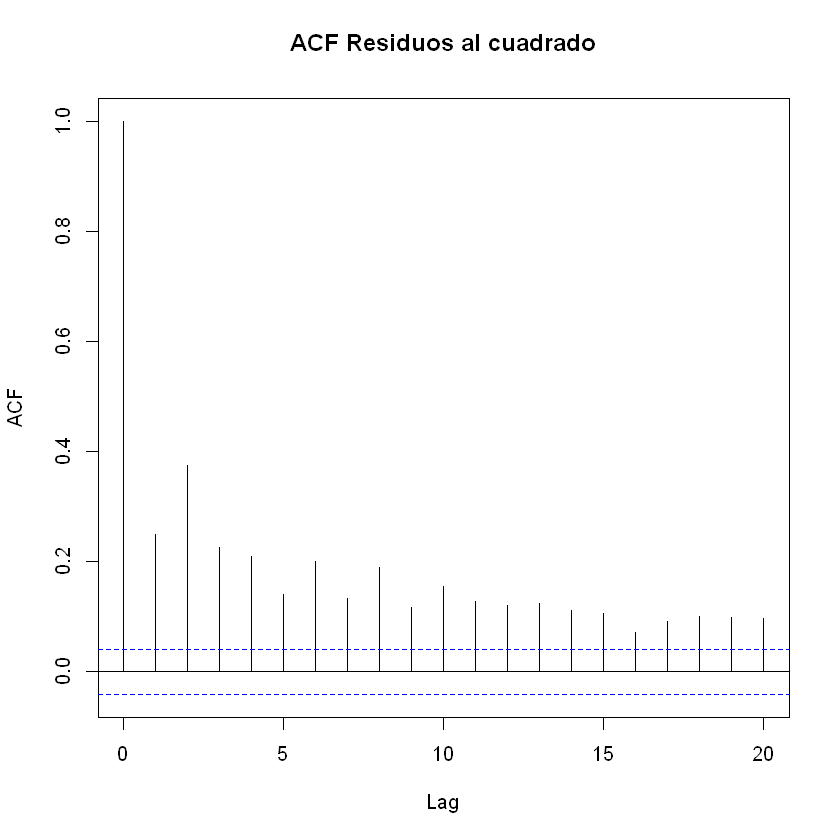

In [66]:
acf(ar1_mod$residuals^2, lag.max = 20, main = "ACF Residuos al cuadrado")

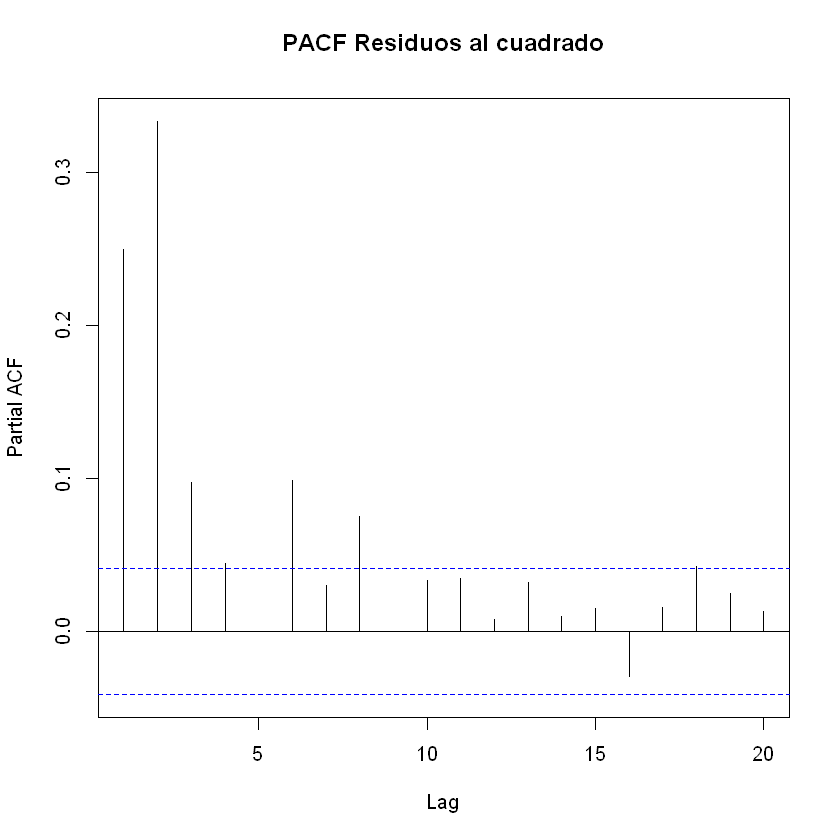

In [67]:
pacf(ar1_mod$residual^2, lag.max = 20, main = "PACF Residuos al cuadrado")

Hay muchas opciones para el modelo GARCH, nos dejaremos llevar por un enfoque parsimonioso y escogeremos un GARCH(1, 1), un IGARCH(1, 1), un EGARCH(1, 1) y un GJR-GARCH(1, 1). Empecemos con el modelo GARCH(1, 1).

In [60]:
garch_spec <- ugarchspec(variance.model = list(model = "sGARCH", garchOrder = c(1, 1)), 
                       mean.model = list(armaOrder = c(5, 0), include.mean = TRUE), distribution.model = "std")
garch_mod <- ugarchfit(spec = garch_spec, data = sp_datos$ret[2:(n - 4)], fit.control = list(stationarity = 1))

In [61]:
show(garch_mod)


*---------------------------------*
*          GARCH Model Fit        *
*---------------------------------*

Conditional Variance Dynamics 	
-----------------------------------
GARCH Model	: sGARCH(1,1)
Mean Model	: ARFIMA(5,0,0)
Distribution	: std 

Optimal Parameters
------------------------------------
        Estimate  Std. Error  t value Pr(>|t|)
mu      0.000863    0.000109  7.93773 0.000000
ar1    -0.053810    0.021730 -2.47625 0.013277
ar2    -0.019431    0.021865 -0.88869 0.374169
ar3    -0.026499    0.021459 -1.23484 0.216889
ar4    -0.030362    0.021207 -1.43171 0.152226
ar5    -0.046633    0.020567 -2.26733 0.023370
omega   0.000003    0.000002  1.68623 0.091751
alpha1  0.178200    0.029770  5.98583 0.000000
beta1   0.806193    0.028279 28.50860 0.000000
shape   5.134505    0.594648  8.63453 0.000000

Robust Standard Errors:
        Estimate  Std. Error  t value Pr(>|t|)
mu      0.000863    0.000101  8.54170 0.000000
ar1    -0.053810    0.019665 -2.73630 0.006213
ar2    -0

Evaluemos el modelo AR(1)-GARCH(1, 1).

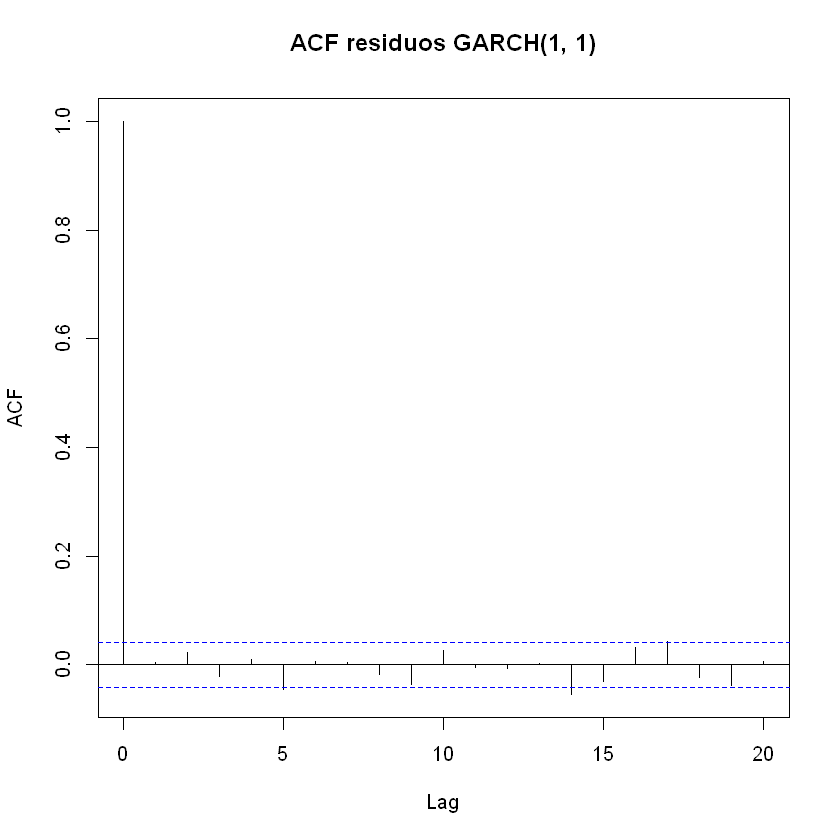

In [62]:
acf(garch_mod@fit$residuals, lag.max = 20, main = "ACF residuos GARCH(1, 1)")

In [63]:
for (i in c(5, 10, 15)) {
    port_test <- Box.test(garch_mod@fit$residuals, lag = i, type = "Ljung-Box")
    res <- paste("Para los ", i, "primeros rezagos el p.value es ", port_test$p.value)
    print(res)
}

[1] "Para los  5 primeros rezagos el p.value es  0.217425782606262"
[1] "Para los  10 primeros rezagos el p.value es  0.257693048121389"
[1] "Para los  15 primeros rezagos el p.value es  0.111942590486279"


In [68]:
stan_res1 <- garch_mod@fit$residuals / garch_mod@fit$sigma

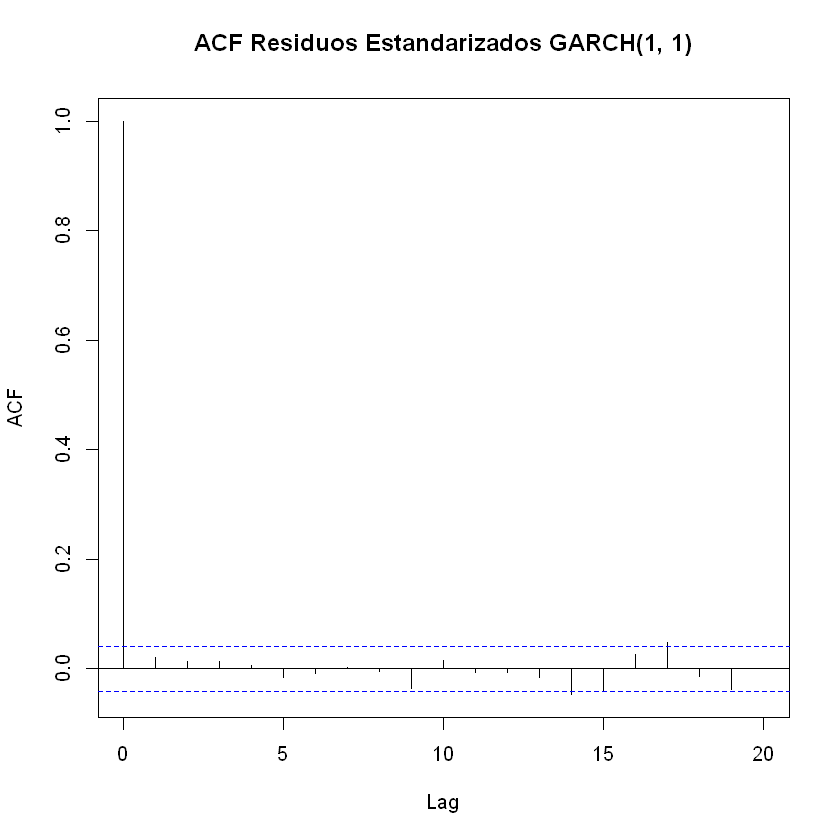

In [69]:
acf(stan_res1, lag.max = 20, main = "ACF Residuos Estandarizados GARCH(1, 1)")

In [73]:
for (i in c(5, 10, 15, 20)) {
    port_test <- Box.test(stan_res1, lag = i, type = "Ljung-Box")
    res <- paste("Para los ", i, "primeros rezagos el p.value es ", port_test$p.value)
    print(res)
}

[1] "Para los  5 primeros rezagos el p.value es  0.784744489628702"
[1] "Para los  10 primeros rezagos el p.value es  0.791734145211792"
[1] "Para los  15 primeros rezagos el p.value es  0.386375830011102"
[1] "Para los  20 primeros rezagos el p.value es  0.156692031869607"


El modelo AR(5)-GARCH(1, 1) cumple con todos los requisitos de evaluación y ahora evaluamos su pronóstico.

In [74]:
garch_for <- ugarchforecast(garch_mod, n.ahead = 5)

In [76]:
eval_for <- data.frame(Fecha = sp_datos$date[(n - 4):n], ret_obs = sp_datos$ret[(n - 4):n],
                      Ret_for1 = garch_for@forecast$seriesFor, 
                       Vol_for1 = garch_for@forecast$sigmaFor)

In [79]:
colnames(eval_for)[3:4] <- c("Ret_for1", "Vol_for1")
eval_for

,Fecha,ret_obs,Ret_for1,Vol_for1
,<date>,<dbl>,<dbl>,<dbl>
T+1,2019-12-23,0.0008661436,0.0007522098,0.005117676
T+2,2019-12-24,-0.0001954482,0.0007120031,0.005322703
T+3,2019-12-26,0.0051281666,0.0005816119,0.005517094
T+4,2019-12-27,0.0000339849,0.0006936246,0.005701982
T+5,2019-12-30,-0.0057808226,0.0008848532,0.005878308


In [82]:
rmse1 <- sqrt(mean((eval_for$ret_obs - eval_for$Ret_for1)^2))
rmse1

[1] 0.003643459

Consideremos ahora el modelo AR(5)-IGARCH(1, 1).

In [83]:
igarch_spec <- ugarchspec(variance.model = list(model = "iGARCH", garchOrder = c(1, 1)), 
                       mean.model = list(armaOrder = c(5, 0), include.mean = TRUE), distribution.model = "std")
igarch_mod <- ugarchfit(spec = igarch_spec, data = sp_datos$ret[2:(n - 4)])

In [84]:
show(igarch_mod)


*---------------------------------*
*          GARCH Model Fit        *
*---------------------------------*

Conditional Variance Dynamics 	
-----------------------------------
GARCH Model	: iGARCH(1,1)
Mean Model	: ARFIMA(5,0,0)
Distribution	: std 

Optimal Parameters
------------------------------------
        Estimate  Std. Error  t value Pr(>|t|)
mu      0.000862    0.000108  7.96502 0.000000
ar1    -0.054129    0.021714 -2.49282 0.012673
ar2    -0.019513    0.021855 -0.89281 0.371959
ar3    -0.026485    0.021453 -1.23459 0.216985
ar4    -0.030458    0.021223 -1.43514 0.151247
ar5    -0.046316    0.020557 -2.25310 0.024253
omega   0.000002    0.000002  1.38007 0.167567
alpha1  0.191990    0.030600  6.27423 0.000000
beta1   0.808010          NA       NA       NA
shape   4.822974    0.474720 10.15963 0.000000

Robust Standard Errors:
        Estimate  Std. Error  t value Pr(>|t|)
mu      0.000862    0.000113   7.6381 0.000000
ar1    -0.054129    0.020984  -2.5795 0.009893
ar2    -0

Evaluemos el modelo AR(5)-IGARCH(1, 1):

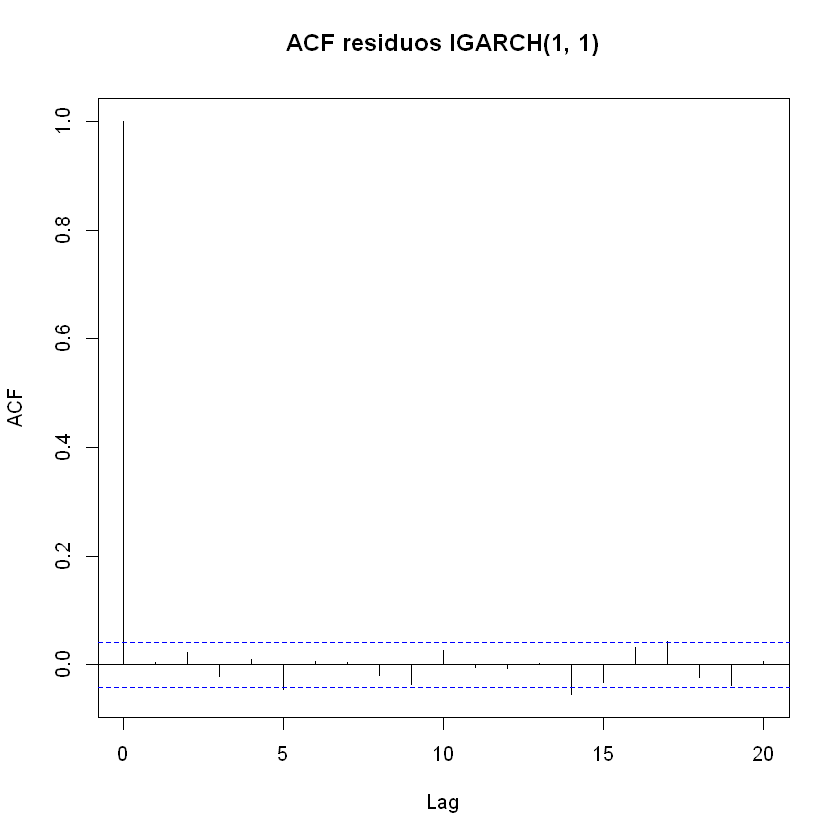

In [85]:
acf(igarch_mod@fit$residuals, lag.max = 20, main = "ACF residuos IGARCH(1, 1)")

In [86]:
for (i in c(5, 10, 15)) {
    port_test <- Box.test(igarch_mod@fit$residuals, lag = i, type = "Ljung-Box")
    res <- paste("Para los ", i, "primeros rezagos el p.value es ", port_test$p.value)
    print(res)
}

[1] "Para los  5 primeros rezagos el p.value es  0.211027026172196"
[1] "Para los  10 primeros rezagos el p.value es  0.252372292604913"
[1] "Para los  15 primeros rezagos el p.value es  0.109654907227084"


In [87]:
stan_res2 <- igarch_mod@fit$residuals / igarch_mod@fit$sigma

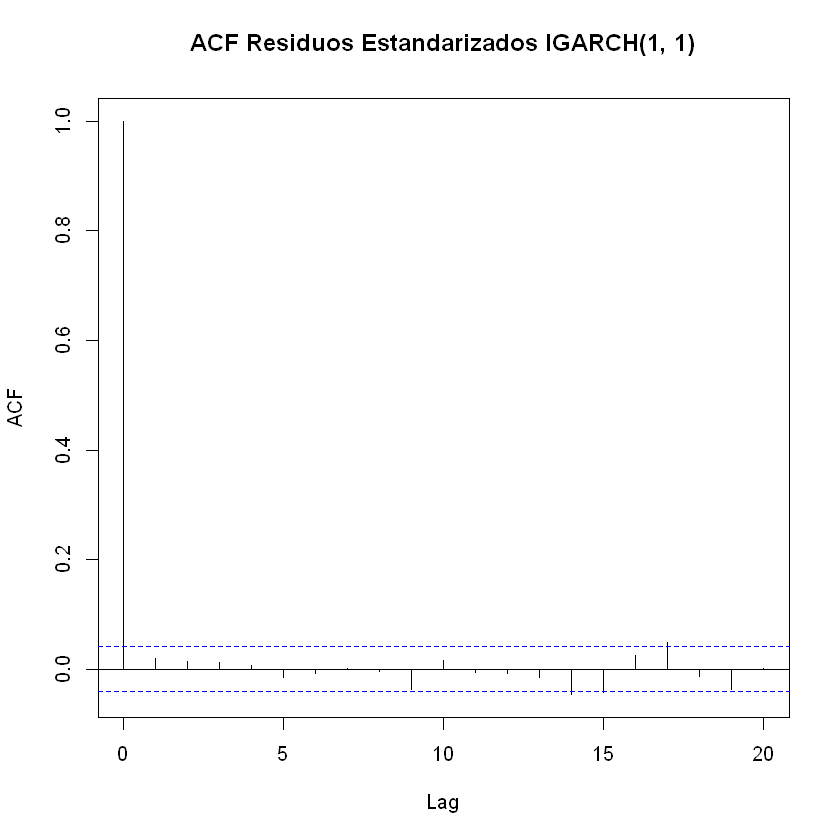

In [88]:
acf(stan_res2, lag.max = 20, main = "ACF Residuos Estandarizados IGARCH(1, 1)")

In [89]:
for (i in c(5, 10, 15, 20)) {
    port_test <- Box.test(stan_res2, lag = i, type = "Ljung-Box")
    res <- paste("Para los ", i, "primeros rezagos el p.value es ", port_test$p.value)
    print(res)
}

[1] "Para los  5 primeros rezagos el p.value es  0.800164729767959"
[1] "Para los  10 primeros rezagos el p.value es  0.803137935408115"
[1] "Para los  15 primeros rezagos el p.value es  0.3976956181596"
[1] "Para los  20 primeros rezagos el p.value es  0.161454458302111"


El modelo AR(5)-IGARCH(1, 1) cumple con todos los criterios de evaluación; ahora veremos sus pronósticos.

In [90]:
igarch_for <- ugarchforecast(igarch_mod, n.ahead = 5)

Warning message in `setfixed<-`(`*tmp*`, value = as.list(pars)):
"Unrecognized Parameter in Fixed Values: beta1...Ignored"


In [91]:
eval_for$Ret_for2 <- igarch_for@forecast$seriesFor
eval_for$Vol_for2 <- igarch_for@forecast$sigmaFor

In [92]:
eval_for

,Fecha,ret_obs,Ret_for1,Vol_for1,Ret_for2,Vol_for2
,<date>,<dbl>,<dbl>,<dbl>,"<dbl[,1]>","<dbl[,1]>"
T+1,2019-12-23,0.0008661436,0.0007522098,0.005117676,0.0007501601,0.005118779
T+2,2019-12-24,-0.0001954482,0.0007120031,0.005322703,0.0007097278,0.005338201
T+3,2019-12-26,0.0051281666,0.0005816119,0.005517094,0.0005808568,0.005548953
T+4,2019-12-27,0.0000339849,0.0006936246,0.005701982,0.0006934353,0.005751989
T+5,2019-12-30,-0.0057808226,0.0008848532,0.005878308,0.0008833666,0.005948098


In [93]:
rmse2 <- sqrt(mean((eval_for$ret_obs - eval_for$Ret_for2)^2))
rmse2

[1] 0.003642996

Ahora consideremos el modelo AR(5)-EGARCH(1, 1):

In [95]:
egarch_spec <- ugarchspec(variance.model = list(model = "eGARCH", garchOrder = c(1, 1)), 
                       mean.model = list(armaOrder = c(5, 0), include.mean = TRUE), distribution.model = "std")
egarch_mod <- ugarchfit(spec = egarch_spec, data = sp_datos$ret[2:(n - 4)])

In [96]:
show(egarch_mod)


*---------------------------------*
*          GARCH Model Fit        *
*---------------------------------*

Conditional Variance Dynamics 	
-----------------------------------
GARCH Model	: eGARCH(1,1)
Mean Model	: ARFIMA(5,0,0)
Distribution	: std 

Optimal Parameters
------------------------------------
        Estimate  Std. Error    t value Pr(>|t|)
mu      0.000578    0.000114    5.06282  0.00000
ar1    -0.045664    0.020955   -2.17916  0.02932
ar2    -0.004406    0.020898   -0.21084  0.83301
ar3    -0.005830    0.020315   -0.28698  0.77413
ar4    -0.006890    0.020450   -0.33692  0.73617
ar5    -0.030720    0.018861   -1.62874  0.10337
omega  -0.466087    0.003824 -121.88398  0.00000
alpha1 -0.227674    0.016912  -13.46209  0.00000
beta1   0.953136    0.000620 1536.42938  0.00000
gamma1  0.181097    0.014419   12.55970  0.00000
shape   6.083142    0.785824    7.74110  0.00000

Robust Standard Errors:
        Estimate  Std. Error    t value Pr(>|t|)
mu      0.000578    0.000130  

El coeficiente $\aleph = -\frac{0.22}{0.18} = -1.22$ por lo que una sorpresa negativa tiende a incrementar la volatilidad y una sorpresa positiva tiende a reducir la volatilidad. Evaluemos el modelo AR(5)-EGARCH(1, 1).

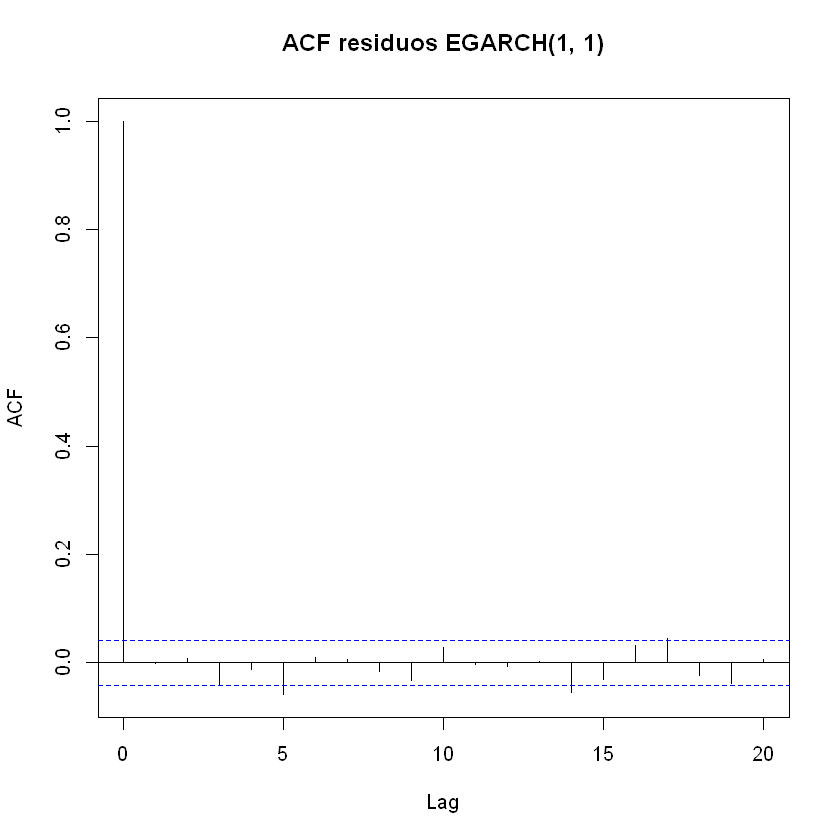

In [110]:
acf(egarch_mod@fit$residuals, lag.max = 20, main = "ACF residuos EGARCH(1, 1)")

In [98]:
for (i in c(5, 10, 15)) {
    port_test <- Box.test(egarch_mod@fit$residuals, lag = i, type = "Ljung-Box")
    res <- paste("Para los ", i, "primeros rezagos el p.value es ", port_test$p.value)
    print(res)
}

[1] "Para los  5 primeros rezagos el p.value es  0.0340655657851293"
[1] "Para los  10 primeros rezagos el p.value es  0.0675553136372556"
[1] "Para los  15 primeros rezagos el p.value es  0.0321729843397048"


In [99]:
stan_res3 <- egarch_mod@fit$residuals / egarch_mod@fit$sigma

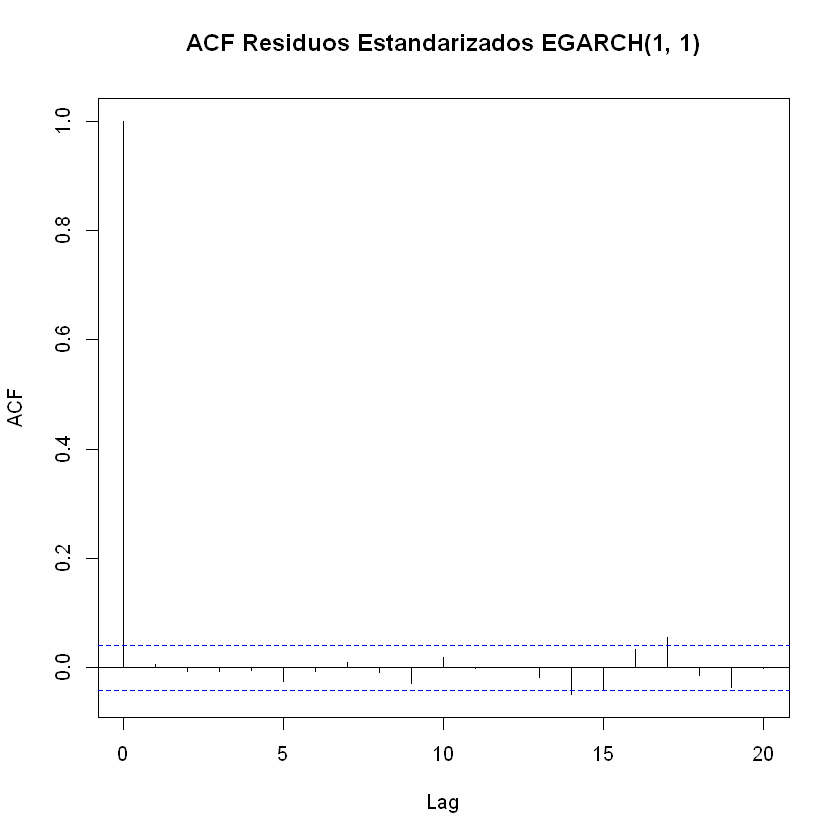

In [100]:
acf(stan_res3, lag.max = 20, main = "ACF Residuos Estandarizados EGARCH(1, 1)")

In [101]:
for (i in c(5, 10, 15, 20)) {
    port_test <- Box.test(stan_res3, lag = i, type = "Ljung-Box")
    res <- paste("Para los ", i, "primeros rezagos el p.value es ", port_test$p.value)
    print(res)
}

[1] "Para los  5 primeros rezagos el p.value es  0.888831885264978"
[1] "Para los  10 primeros rezagos el p.value es  0.889898002397182"
[1] "Para los  15 primeros rezagos el p.value es  0.470836834659117"
[1] "Para los  20 primeros rezagos el p.value es  0.121815802271289"


El modelo AR(5)-EGARCH(1, 1) cumple con los criterios de evaluación. Ahora analicemos los pronósticos:

In [102]:
egarch_for <- ugarchforecast(egarch_mod, n.ahead = 5)

In [103]:
eval_for$Ret_for3 <- egarch_for@forecast$seriesFor
eval_for$Vol_for3 <- egarch_for@forecast$sigmaFor

In [104]:
eval_for

,Fecha,ret_obs,Ret_for1,Vol_for1,Ret_for2,Vol_for2,Ret_for3,Vol_for3
,<date>,<dbl>,<dbl>,<dbl>,"<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>"
T+1,2019-12-23,0.0008661436,0.0007522098,0.005117676,0.0007501601,0.005118779,0.0005379323,0.003673242
T+2,2019-12-24,-0.0001954482,0.0007120031,0.005322703,0.0007097278,0.005338201,0.0005579362,0.003783996
T+3,2019-12-26,0.0051281666,0.0005816119,0.005517094,0.0005808568,0.005548953,0.0004286332,0.003892666
T+4,2019-12-27,0.0000339849,0.0006936246,0.005701982,0.0006934353,0.005751989,0.0004495517,0.003999147
T+5,2019-12-30,-0.0057808226,0.0008848532,0.005878308,0.0008833666,0.005948098,0.0005766062,0.004103348


In [105]:
rmse3 <- sqrt(mean((eval_for$ret_obs - eval_for$Ret_for3)^2))
rmse3

[1] 0.003559509

Finalmente consideremos el modelo AR(5)-GJR-GARCH(1,1).

In [106]:
gjrgarch_spec <- ugarchspec(variance.model = list(model = "gjrGARCH", garchOrder = c(1, 1)), 
                       mean.model = list(armaOrder = c(5, 0), include.mean = TRUE), distribution.model = "std")
gjrgarch_mod <- ugarchfit(spec = gjrgarch_spec, data = sp_datos$ret[2:(n - 4)])

In [107]:
show(gjrgarch_mod)


*---------------------------------*
*          GARCH Model Fit        *
*---------------------------------*

Conditional Variance Dynamics 	
-----------------------------------
GARCH Model	: gjrGARCH(1,1)
Mean Model	: ARFIMA(5,0,0)
Distribution	: std 

Optimal Parameters
------------------------------------
        Estimate  Std. Error   t value Pr(>|t|)
mu      0.000637    0.000111  5.724654 0.000000
ar1    -0.042609    0.021259 -2.004255 0.045043
ar2    -0.007047    0.021496 -0.327835 0.743036
ar3    -0.016841    0.020950 -0.803880 0.421466
ar4    -0.014618    0.020382 -0.717194 0.473254
ar5    -0.037914    0.019720 -1.922642 0.054525
omega   0.000003    0.000000  6.308612 0.000000
alpha1  0.000000    0.003367  0.000023 0.999981
beta1   0.809382    0.015866 51.012665 0.000000
gamma1  0.318861    0.037145  8.584224 0.000000
shape   5.784013    0.691934  8.359192 0.000000

Robust Standard Errors:
        Estimate  Std. Error   t value Pr(>|t|)
mu      0.000637    0.000114  5.582236 0.

Evaluemos el modelo AR(5)-GJR-GARCH(1, 1).

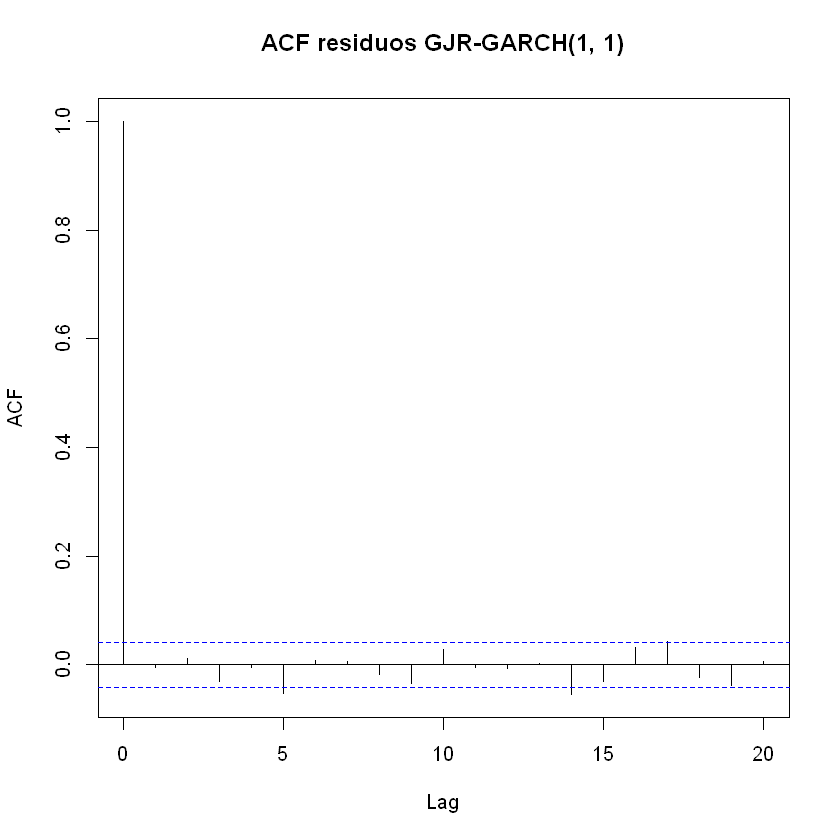

In [109]:
acf(gjrgarch_mod@fit$residuals, lag.max = 20, main = "ACF residuos GJR-GARCH(1, 1)")

In [111]:
for (i in c(5, 10, 15)) {
    port_test <- Box.test(gjrgarch_mod@fit$residuals, lag = i, type = "Ljung-Box")
    res <- paste("Para los ", i, "primeros rezagos el p.value es ", port_test$p.value)
    print(res)
}

[1] "Para los  5 primeros rezagos el p.value es  0.12696407590487"
[1] "Para los  10 primeros rezagos el p.value es  0.174811822290789"
[1] "Para los  15 primeros rezagos el p.value es  0.0783834172873897"


In [112]:
stan_res4 <- gjrgarch_mod@fit$residuals / gjrgarch_mod@fit$sigma

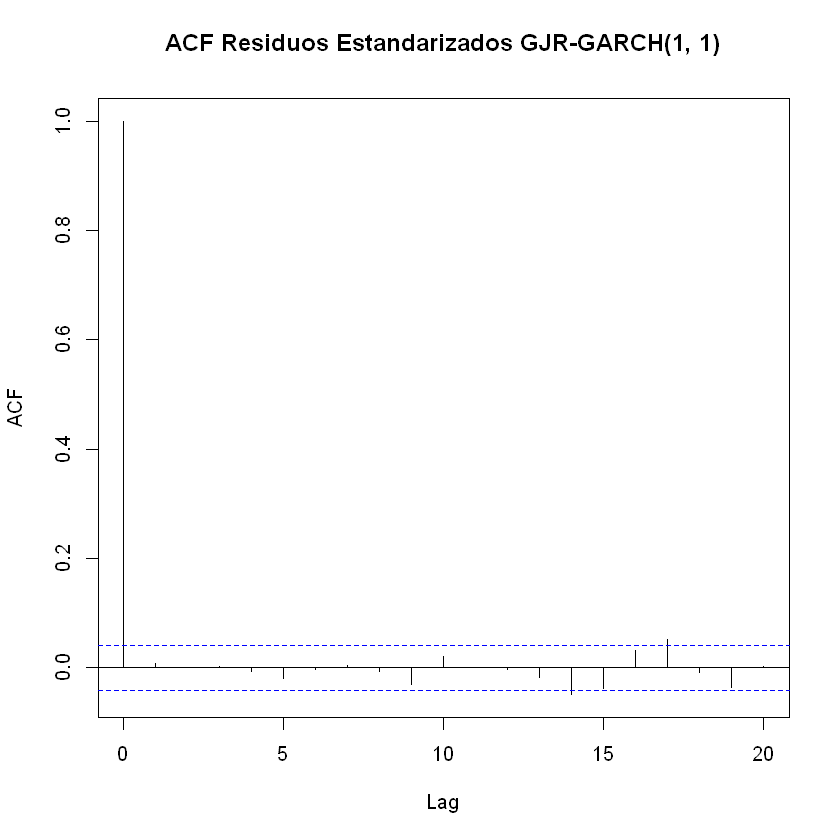

In [113]:
acf(stan_res4, lag.max = 20, main = "ACF Residuos Estandarizados GJR-GARCH(1, 1)")

In [114]:
for (i in c(5, 10, 15, 20)) {
    port_test <- Box.test(stan_res4, lag = i, type = "Ljung-Box")
    res <- paste("Para los ", i, "primeros rezagos el p.value es ", port_test$p.value)
    print(res)
}

[1] "Para los  5 primeros rezagos el p.value es  0.946295858577633"
[1] "Para los  10 primeros rezagos el p.value es  0.933039688618426"
[1] "Para los  15 primeros rezagos el p.value es  0.555408305200816"
[1] "Para los  20 primeros rezagos el p.value es  0.195949080394453"


El modelo AR(5)-GJR-GARCH(1, 1) aprueba los criterios de evaluación. Ahora analicemos los pronósticos:

In [115]:
gjrgarch_for <- ugarchforecast(gjrgarch_mod, n.ahead = 5)

In [116]:
eval_for$Ret_for4 <- gjrgarch_for@forecast$seriesFor
eval_for$Vol_for4 <- gjrgarch_for@forecast$sigmaFor

In [117]:
eval_for

,Fecha,ret_obs,Ret_for1,Vol_for1,Ret_for2,Vol_for2,Ret_for3,Vol_for3,Ret_for4,Vol_for4
,<date>,<dbl>,<dbl>,<dbl>,"<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>"
T+1,2019-12-23,0.0008661436,0.0007522098,0.005117676,0.0007501601,0.005118779,0.0005379323,0.003673242,0.0005597989,0.004256971
T+2,2019-12-24,-0.0001954482,0.0007120031,0.005322703,0.0007097278,0.005338201,0.0005579362,0.003783996,0.0005510173,0.004516556
T+3,2019-12-26,0.0051281666,0.0005816119,0.005517094,0.0005808568,0.005548953,0.0004286332,0.003892666,0.0004296817,0.004754548
T+4,2019-12-27,0.0000339849,0.0006936246,0.005701982,0.0006934353,0.005751989,0.0004495517,0.003999147,0.0004812859,0.004974270
T+5,2019-12-30,-0.0057808226,0.0008848532,0.005878308,0.0008833666,0.005948098,0.0005766062,0.004103348,0.0006392063,0.005178256


In [118]:
rmse4 <- sqrt(mean((eval_for$ret_obs - eval_for$Ret_for4)^2))
rmse4

[1] 0.003581722

In [119]:
rmse_all <- c(rmse1, rmse2, rmse3, rmse4)
which.min(rmse_all)

[1] 3

El modelo con el menor RMSE es el AR(5)-EGARCH(1, 1). Este sería el modelo que escogeríamos para realizar los pronósticos para 5 días del S&P500.

Hay muchas más opciones del paquete `rugarch`. Los interesados pueden ver toda la información [aqui.](https://cran.r-project.org/web/packages/rugarch/vignettes/Introduction_to_the_rugarch_package.pdf)